## INTRODUCTION AND DATASET DESCRIPTION :
    
    

In [1]:
import ucimlrepo
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('phishing_and_benign_websites.csv')

In [3]:
data.head()

,URLs,Label
0,http://www.wmmayhem.com/,Benign
1,http://www.ballymenaunitedyouthacademy.com/,Benign
2,http://www.brusselsgaybars.com/,Benign
3,http://www.sportsbettingtennis.net/,Benign
4,http://www.i29.mobi/,Benign


In [4]:
data[data['Label'] == "Phishing"]

,URLs,Label
19400,https://www.rakuten-account-jp.best/,Phishing
19401,https://www.rakuten-account-jp.buzz/,Phishing
19402,https://www.secure-apphalifaxupdate-verificati...,Phishing
19403,https://www.smbc-cardkame-jp.cyou/,Phishing
19404,https://www.smbc-cardkame.blog/,Phishing
...,...,...
38795,http://www.xz58plamx.blogspot.com/,Phishing
38796,http://www.zc64cpalz.blogspot.com/,Phishing
38797,http://www.zeynelguven.com//site/help/css/payp...,Phishing
38798,http://www.zpqmf103kd.blogspot.com/,Phishing


In [5]:
data.rename(columns={'URLs':'url'},inplace=True)
data.rename(columns={'Label':'label'},inplace=True)

In [6]:
data.head(2)

,url,label
0,http://www.wmmayhem.com/,Benign
1,http://www.ballymenaunitedyouthacademy.com/,Benign


In [7]:
from urllib.parse import urlparse,urlsplit
import re
import ipaddress

In [8]:
def extract_features(url):
    features = {}
    parsed_url = urlparse(url)

      
    features['length_url'] = len(url)
    features['length_hostname'] = len(parsed_url.hostname)
    features['ip'] = parsed_url.netloc.split(':')[0] if ':' in parsed_url.netloc else None
    features['no_dots'] = url.count('.')
    features['no_hyphens'] = url.count('-')
    features['no_at'] = url.count('@')

      
    features['no_qm'] = url.count('?')
    features['no_and'] = url.count('&')
    features['no_or'] = url.count('|')
    features['no_eq'] = url.count('=')
    features['no_underscore'] = url.count('_')
    features['no_tilde'] = url.count('~')
    features['no_percent'] = url.count('%')
    features['no_slash'] = url.count('/')
    features['no_star'] = url.count('*')
    features['no_colon'] = url.count(':')
    features['no_comma'] = url.count(',')
    features['no_semicolumn'] = url.count(';')
    features['no_dollar'] = url.count('$')
    features['no_space'] = url.count(' ')

    
    features['http_in_path'] = 'http' in url.lower() and 'http' not in parsed_url.netloc
    features['https_token'] = 'https' in url.lower()
    features['no_www'] = url.lower().count('www.')

   
    features['ratio_digits_url'] = sum(c.isdigit() for c in url) / len(url)
    features['ratio_digits_host'] = sum(c.isdigit() for c in parsed_url.hostname) / len(parsed_url.hostname)

   
    features['punycode'] = any(ord(c) > 127 for c in parsed_url.hostname) 
    features['port'] = parsed_url.port
    features['tld_in_path'] = parsed_url.path.split('.')[-1] in parsed_url.hostname.split('.')[-1:]
    features['tld_in_subdomain'] = '.'.join(parsed_url.hostname.split('.')[-2:]) in parsed_url.hostname

    
    subdomains = parsed_url.hostname.split('.')[:-1]
    features['no_subdomains'] = len(subdomains)
    features['prefix_suffix'] = subdomains[0] == subdomains[-1] if subdomains else False
    

    
    features['shortening_service'] = any(service in url.lower() for service in ['bitly', 'goo.gl', 'tinyurl'])
    features['path_extension'] = parsed_url.path.split('.')[-1] if '.' in parsed_url.path else None


    return features

In [9]:
data['features'] = data['url'].apply(extract_features)

In [10]:
data['features'][0]

{'length_url': 24,
 'length_hostname': 16,
 'ip': None,
 'no_dots': 2,
 'no_hyphens': 0,
 'no_at': 0,
 'no_qm': 0,
 'no_and': 0,
 'no_or': 0,
 'no_eq': 0,
 'no_underscore': 0,
 'no_tilde': 0,
 'no_percent': 0,
 'no_slash': 3,
 'no_star': 0,
 'no_colon': 1,
 'no_comma': 0,
 'no_semicolumn': 0,
 'no_dollar': 0,
 'no_space': 0,
 'http_in_path': True,
 'https_token': False,
 'no_www': 1,
 'ratio_digits_url': 0.0,
 'ratio_digits_host': 0.0,
 'punycode': False,
 'port': None,
 'tld_in_path': False,
 'tld_in_subdomain': True,
 'no_subdomains': 2,
 'prefix_suffix': False,
 'shortening_service': False,
 'path_extension': None}

In [11]:
features_df = pd.DataFrame(data['features'].tolist())
data = pd.concat([data, features_df], axis=1)
data

,url,label,features,length_url,length_hostname,ip,no_dots,no_hyphens,no_at,no_qm,...,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,no_subdomains,prefix_suffix,shortening_service,path_extension
0,http://www.wmmayhem.com/,Benign,"{'length_url': 24, 'length_hostname': 16, 'ip'...",24,16,None,2,0,0,0,...,0.000000,0.000000,False,NaN,False,True,2,False,False,None
1,http://www.ballymenaunitedyouthacademy.com/,Benign,"{'length_url': 43, 'length_hostname': 35, 'ip'...",43,35,None,2,0,0,0,...,0.000000,0.000000,False,NaN,False,True,2,False,False,None
2,http://www.brusselsgaybars.com/,Benign,"{'length_url': 31, 'length_hostname': 23, 'ip'...",31,23,None,2,0,0,0,...,0.000000,0.000000,False,NaN,False,True,2,False,False,None
3,http://www.sportsbettingtennis.net/,Benign,"{'length_url': 35, 'length_hostname': 27, 'ip'...",35,27,None,2,0,0,0,...,0.000000,0.000000,False,NaN,False,True,2,False,False,None
4,http://www.i29.mobi/,Benign,"{'length_url': 20, 'length_hostname': 12, 'ip'...",20,12,None,2,0,0,0,...,0.100000,0.166667,False,NaN,False,True,2,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38795,http://www.xz58plamx.blogspot.com/,Phishing,"{'length_url': 34, 'length_hostname': 26, 'ip'...",34,26,None,3,0,0,0,...,0.058824,0.076923,False,NaN,False,True,3,False,False,None
38796,http://www.zc64cpalz.blogspot.com/,Phishing,"{'length_url': 34, 'length_hostname': 26, 'ip'...",34,26,None,3,0,0,0,...,0.058824,0.076923,False,NaN,False,True,3,False,False,None
38797,http://www.zeynelguven.com//site/help/css/payp...,Phishing,"{'length_url': 53, 'length_hostname': 19, 'ip'...",53,19,None,3,0,0,0,...,0.000000,0.000000,False,NaN,False,True,2,False,False,html
38798,http://www.zpqmf103kd.blogspot.com/,Phishing,"{'length_url': 35, 'length_hostname': 27, 'ip'...",35,27,None,3,0,0,0,...,0.085714,0.111111,False,NaN,False,True,3,False,False,None


In [12]:
data.shape

(38800, 36)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38800 entries, 0 to 38799
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 38800 non-null  object 
 1   label               38800 non-null  object 
 2   features            38800 non-null  object 
 3   length_url          38800 non-null  int64  
 4   length_hostname     38800 non-null  int64  
 5   ip                  12 non-null     object 
 6   no_dots             38800 non-null  int64  
 7   no_hyphens          38800 non-null  int64  
 8   no_at               38800 non-null  int64  
 9   no_qm               38800 non-null  int64  
 10  no_and              38800 non-null  int64  
 11  no_or               38800 non-null  int64  
 12  no_eq               38800 non-null  int64  
 13  no_underscore       38800 non-null  int64  
 14  no_tilde            38800 non-null  int64  
 15  no_percent          38800 non-null  int64  
 16  no_s

In [14]:
data.describe()

,length_url,length_hostname,no_dots,no_hyphens,no_at,no_qm,no_and,no_or,no_eq,no_underscore,...,no_colon,no_comma,no_semicolumn,no_dollar,no_space,no_www,ratio_digits_url,ratio_digits_host,port,no_subdomains
count,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,...,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,38800.000000,12.000000,38800.000000
mean,73.680129,24.426392,3.263247,1.153505,0.019536,0.213093,0.200464,0.000077,0.418660,0.499459,...,1.028686,0.046521,0.097242,0.001340,0.001005,1.008892,0.071383,0.022872,4912.166667,2.722990
std,60.261974,11.932832,1.443893,2.343972,0.148984,0.442065,0.921838,0.008793,1.103748,1.456271,...,0.239691,0.427870,0.735209,0.074601,0.040283,0.098434,0.104007,0.081123,4150.837480,0.909224
min,18.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,443.000000,2.000000
25%,41.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,443.000000,2.000000
50%,56.000000,22.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.022727,0.000000,6140.500000,3.000000
75%,86.000000,28.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.101266,0.000000,8890.000000,3.000000
max,2689.000000,214.000000,32.000000,38.000000,6.000000,6.000000,40.000000,1.000000,24.000000,42.000000,...,15.000000,11.000000,40.000000,9.000000,4.000000,4.000000,0.728896,0.631579,8890.000000,28.000000


In [15]:
data['features'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
38795    False
38796    False
38797    False
38798    False
38799    False
Name: features, Length: 38800, dtype: bool

In [16]:
data['label'].value_counts()

Benign      19400
Phishing    19400
Name: label, dtype: int64

In [17]:
data['path_extension'].isnull().sum()

25124

In [18]:
data['ip'].isnull().sum()

38788

In [19]:
data['port'].value_counts()

8890.0    5
443.0     5
8080.0    1
4201.0    1
Name: port, dtype: int64

## EDA

In [20]:
data.drop(columns='features',inplace=True)

array([<Axes: title={'center': 'Benign'}>,
       <Axes: title={'center': 'Phishing'}>], dtype=object)

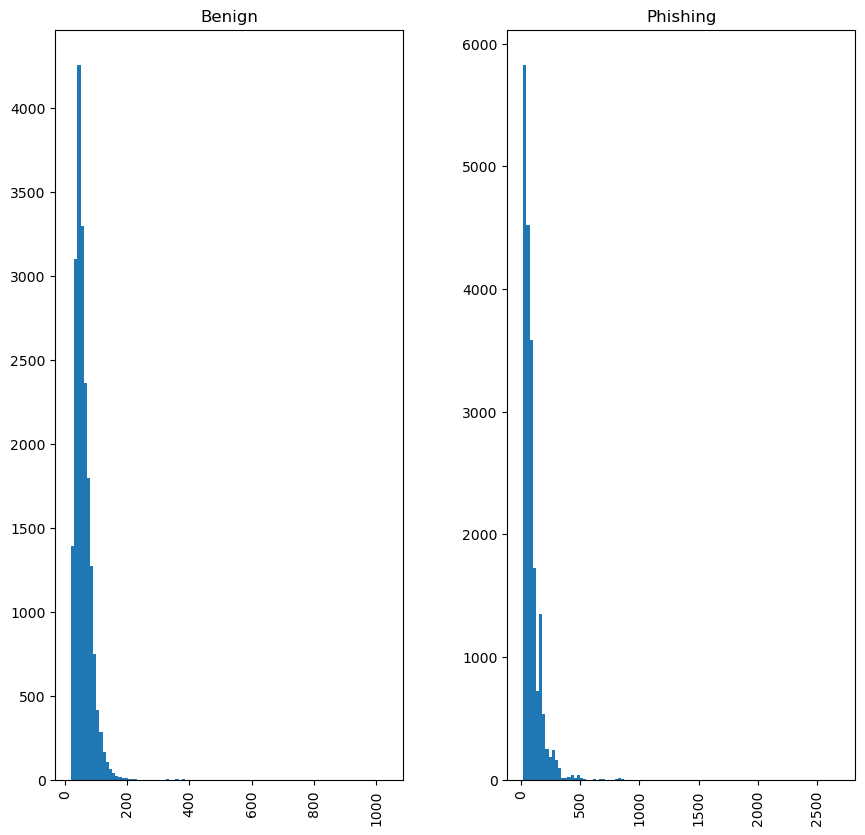

In [21]:
data.hist(column='length_url',by='label',bins=100,figsize=(10,10))

In [22]:
data[data['path_extension']=="php"]

,url,label,length_url,length_hostname,ip,no_dots,no_hyphens,no_at,no_qm,no_and,...,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,no_subdomains,prefix_suffix,shortening_service,path_extension
25,http://www.standardwarriorband.com/index.php,Benign,44,27,None,3,0,0,0,0,...,0.000000,0.00,False,NaN,False,True,2,False,False,php
28,http://www.desautels-events.mcgill.ca/ceo/hach...,Benign,52,30,None,4,1,0,0,0,...,0.000000,0.00,False,NaN,False,True,3,False,False,php
50,http://www.urdb.kirlad.com/character.php?show=151,Benign,49,19,None,4,0,0,1,0,...,0.061224,0.00,False,NaN,False,True,3,False,False,php
136,http://www.totalracesolutionsresults.com/index...,Benign,98,33,None,3,0,0,1,3,...,0.040816,0.00,False,NaN,False,True,2,False,False,php
137,http://www.benalmadena-accommodation.com/bonan...,Benign,52,33,None,3,1,0,0,0,...,0.000000,0.00,False,NaN,False,True,2,False,False,php
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759,http://www.socialgeek.co/cv/img/login1.php,Phishing,42,17,None,3,0,0,0,0,...,0.023810,0.00,False,NaN,False,True,2,False,False,php
38764,http://www.systemoptimizers.com/wp-includes/po...,Phishing,60,24,None,4,1,0,0,0,...,0.000000,0.00,False,NaN,False,True,2,False,False,php
38766,http://www.theampersandgroup.com/system/paypal...,Phishing,119,25,None,3,1,0,2,1,...,0.016807,0.00,False,NaN,False,True,2,False,False,php
38768,http://www.thinkgeeks4u.com/libraries/pattempl...,Phishing,80,20,None,6,0,0,0,0,...,0.012500,0.05,False,NaN,False,True,2,False,False,php


In [23]:
data.head(1)

,url,label,length_url,length_hostname,ip,no_dots,no_hyphens,no_at,no_qm,no_and,...,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,no_subdomains,prefix_suffix,shortening_service,path_extension
0,http://www.wmmayhem.com/,Benign,24,16,None,2,0,0,0,0,...,0.0,0.0,False,NaN,False,True,2,False,False,None


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])
#0-> leg 1->phished

In [25]:
data['special_characters_count'] = data['url'].apply(lambda x: sum(char in "!@#$%^&*()_+{}:<>?|\][;'./,`~" for char in x))
data['numeric_count'] = data['url'].apply(lambda x: sum(char.isdigit() for char in x))

In [26]:
data.head(1)

,url,label,length_url,length_hostname,ip,no_dots,no_hyphens,no_at,no_qm,no_and,...,punycode,port,tld_in_path,tld_in_subdomain,no_subdomains,prefix_suffix,shortening_service,path_extension,special_characters_count,numeric_count
0,http://www.wmmayhem.com/,0,24,16,None,2,0,0,0,0,...,False,NaN,False,True,2,False,False,None,6,0


In [27]:
data['port'].fillna(0, inplace=True)

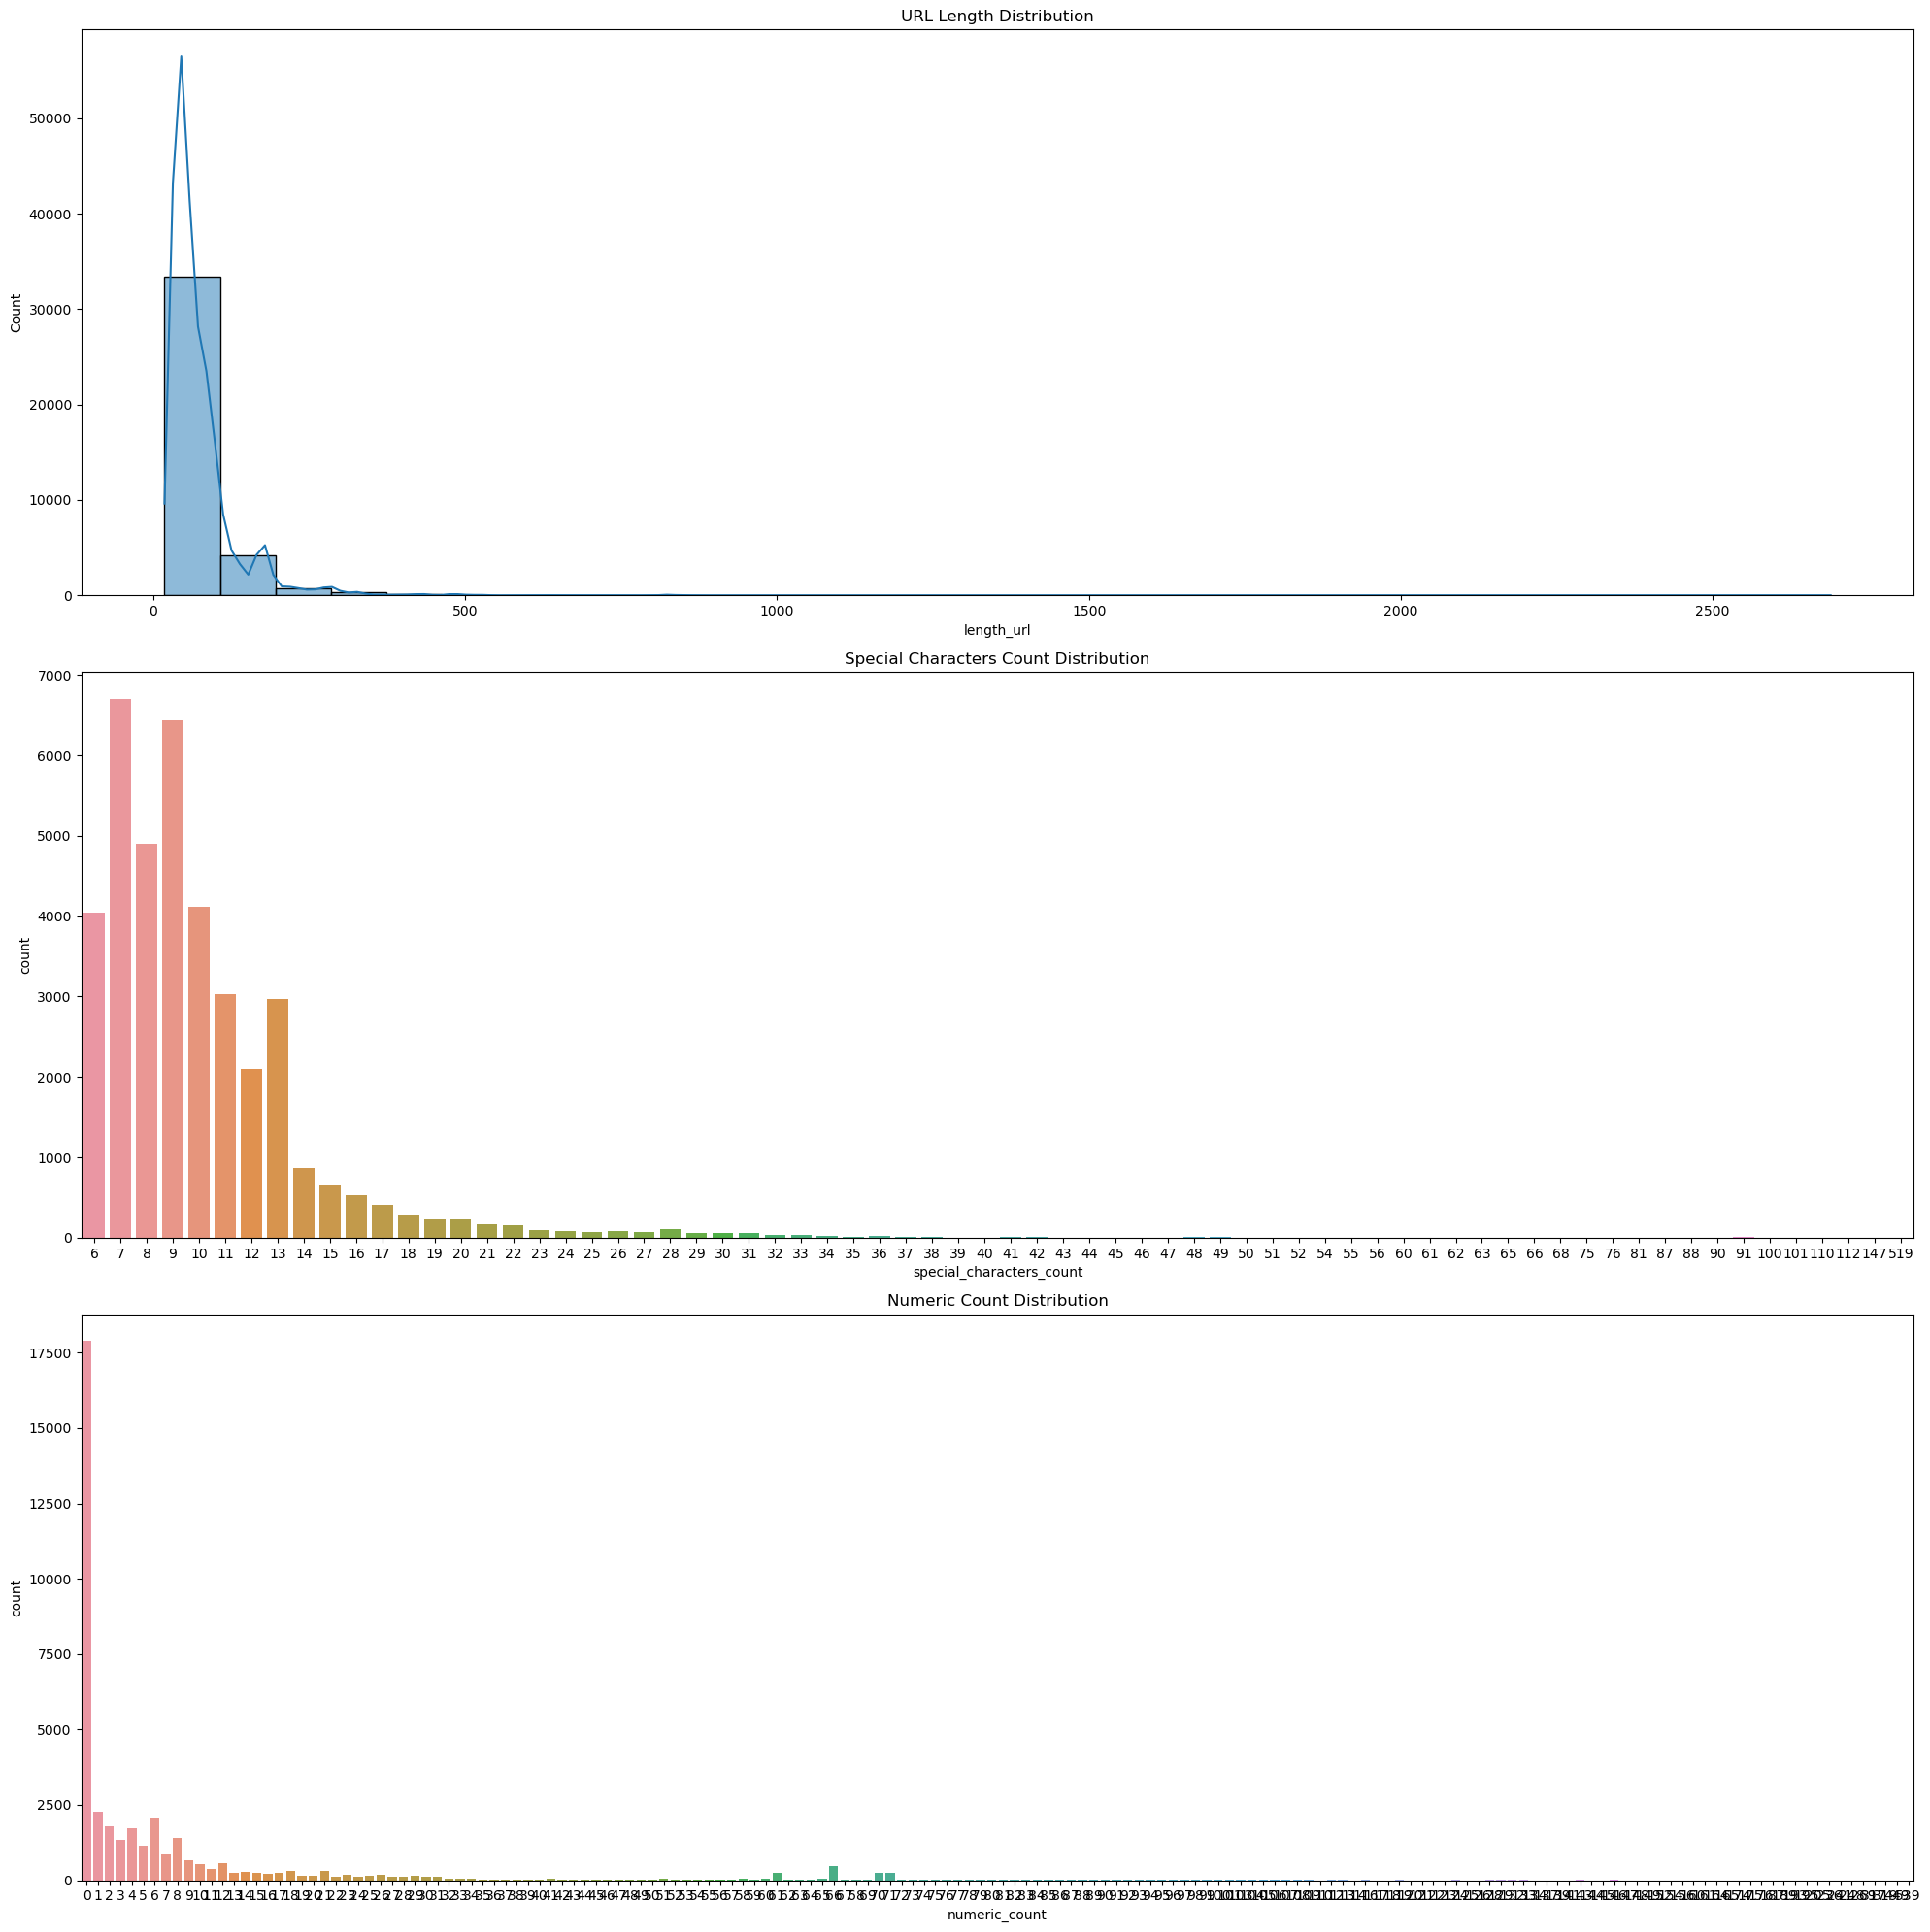

In [28]:
import seaborn as sns
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
sns.histplot(data['length_url'], bins=30, kde=True)
plt.title('URL Length Distribution')

plt.subplot(3, 1, 2)
sns.countplot(x='special_characters_count', data=data)
plt.title('Special Characters Count Distribution')

plt.subplot(3, 1, 3)
sns.countplot(x='numeric_count', data=data)
plt.title('Numeric Count Distribution')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


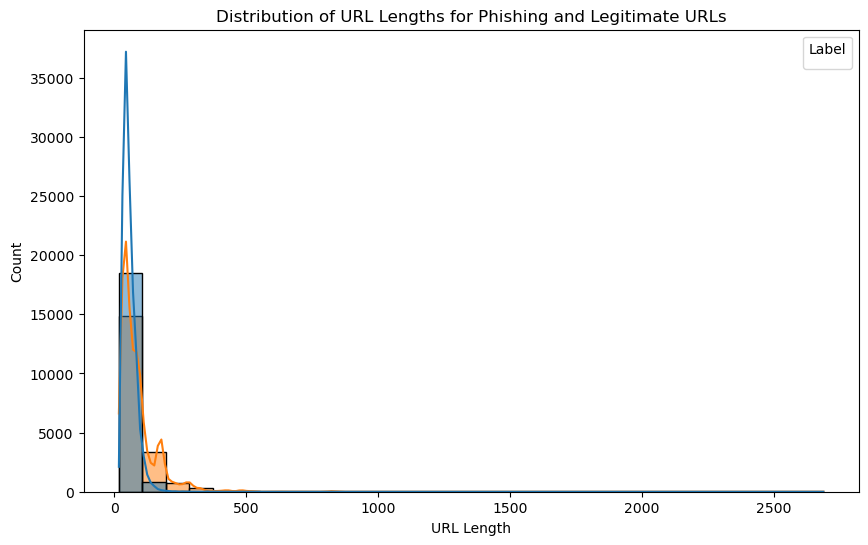

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='length_url', hue='label', bins=30, kde=True)
plt.title('Distribution of URL Lengths for Phishing and Legitimate URLs')
plt.xlabel('URL Length')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

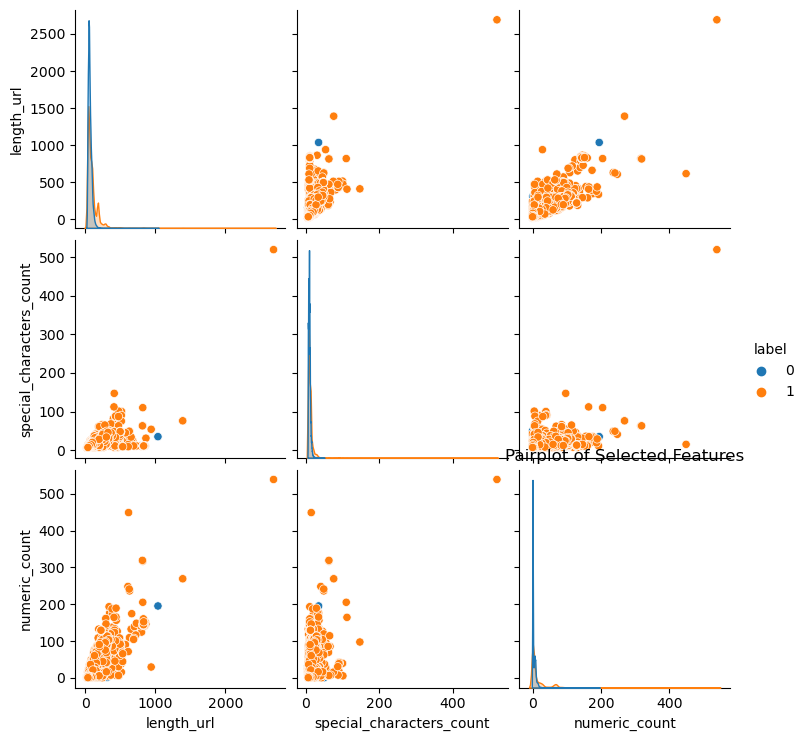

In [30]:
sns.pairplot(data[['length_url', 'special_characters_count', 'numeric_count','label']], hue='label', diag_kind='kde')
plt.title('Pairplot of Selected Features')
plt.show()


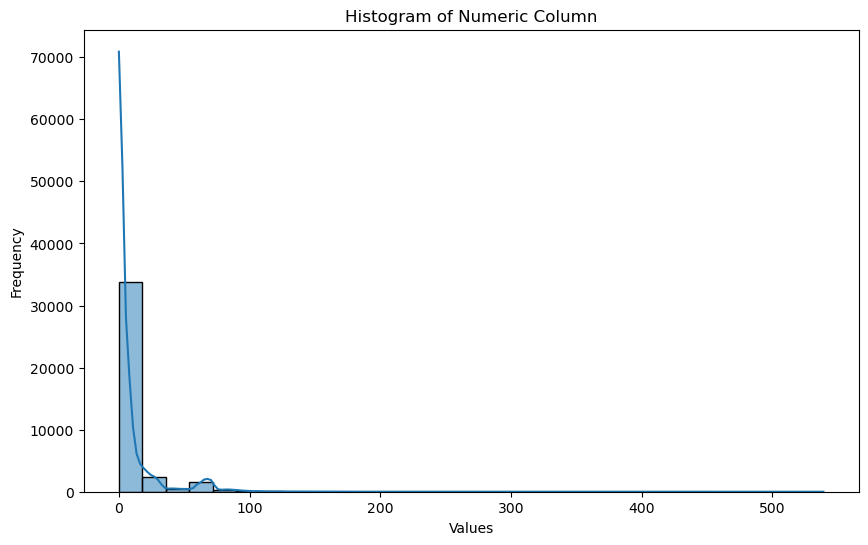

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['numeric_count'], bins=30, kde=True)
plt.title('Histogram of Numeric Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [32]:
data.head(2)

,url,label,length_url,length_hostname,ip,no_dots,no_hyphens,no_at,no_qm,no_and,...,punycode,port,tld_in_path,tld_in_subdomain,no_subdomains,prefix_suffix,shortening_service,path_extension,special_characters_count,numeric_count
0,http://www.wmmayhem.com/,0,24,16,None,2,0,0,0,0,...,False,0.0,False,True,2,False,False,None,6,0
1,http://www.ballymenaunitedyouthacademy.com/,0,43,35,None,2,0,0,0,0,...,False,0.0,False,True,2,False,False,None,6,0


In [33]:
data.columns

Index(['url', 'label', 'length_url', 'length_hostname', 'ip', 'no_dots',
       'no_hyphens', 'no_at', 'no_qm', 'no_and', 'no_or', 'no_eq',
       'no_underscore', 'no_tilde', 'no_percent', 'no_slash', 'no_star',
       'no_colon', 'no_comma', 'no_semicolumn', 'no_dollar', 'no_space',
       'http_in_path', 'https_token', 'no_www', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'no_subdomains', 'prefix_suffix',
       'shortening_service', 'path_extension', 'special_characters_count',
       'numeric_count'],
      dtype='object')

In [34]:
data.corr()['label']

C:\Users\varun\AppData\Local\Temp\ipykernel_22892\3576362257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['label']


label                       1.000000e+00
length_url                  2.593448e-01
length_hostname             1.699353e-01
no_dots                     1.954221e-01
no_hyphens                 -6.010229e-02
no_at                       1.294005e-01
no_qm                       2.607293e-01
no_and                      1.506423e-01
no_or                       2.931165e-03
no_eq                       2.342563e-01
no_underscore              -9.611951e-02
no_tilde                   -4.333000e-02
no_percent                  4.714123e-02
no_slash                    1.583995e-01
no_star                     9.139816e-03
no_colon                    5.559203e-02
no_comma                    1.087275e-01
no_semicolumn               1.266576e-01
no_dollar                   1.727418e-02
no_space                    2.495247e-02
http_in_path               -5.076796e-03
https_token                 5.319577e-01
no_www                      7.881262e-02
ratio_digits_url            2.841986e-01
ratio_digits_hos

In [35]:
status_corr=data.corr()['label'].sort_values(ascending=False)
status_corr

C:\Users\varun\AppData\Local\Temp\ipykernel_22892\840781696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  status_corr=data.corr()['label'].sort_values(ascending=False)


label                       1.000000e+00
https_token                 5.319577e-01
numeric_count               2.947596e-01
ratio_digits_url            2.841986e-01
no_qm                       2.607293e-01
length_url                  2.593448e-01
ratio_digits_host           2.393854e-01
no_eq                       2.342563e-01
no_dots                     1.954221e-01
special_characters_count    1.701292e-01
length_hostname             1.699353e-01
no_slash                    1.583995e-01
no_and                      1.506423e-01
no_at                       1.294005e-01
no_semicolumn               1.266576e-01
no_comma                    1.087275e-01
no_www                      7.881262e-02
no_colon                    5.559203e-02
no_subdomains               4.932330e-02
no_percent                  4.714123e-02
shortening_service          3.089528e-02
no_space                    2.495247e-02
no_dollar                   1.727418e-02
no_star                     9.139816e-03
no_or           

C:\Users\varun\AppData\Local\Temp\ipykernel_22892\100705416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


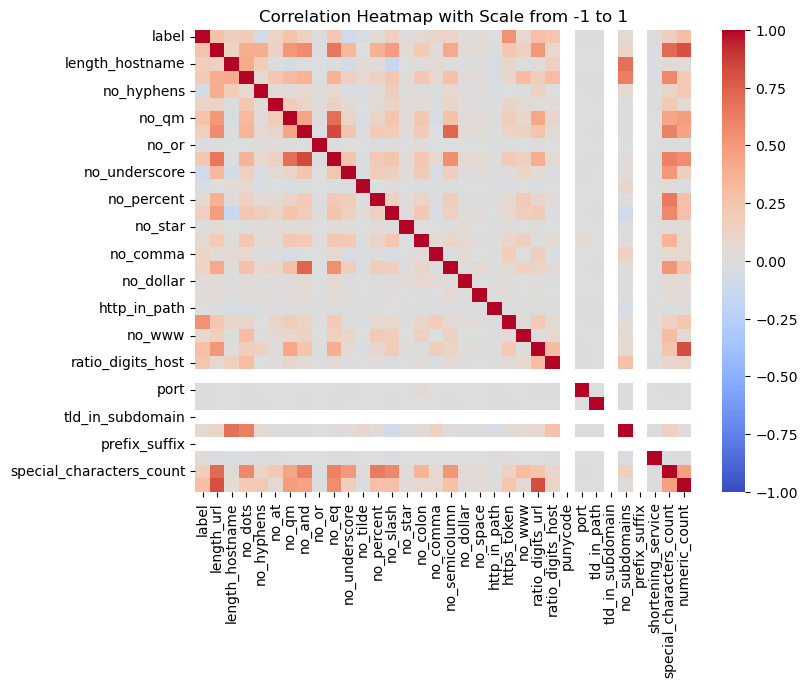

In [36]:
corr_matrix = data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=False, cmap='coolwarm', cbar=True, center=0)
plt.title('Correlation Heatmap with Scale from -1 to 1')
plt.show()

In [37]:
data['punycode'].value_counts()

False    38800
Name: punycode, dtype: int64

In [38]:
data['prefix_suffix'].value_counts()

False    38800
Name: prefix_suffix, dtype: int64

In [39]:
data['tld_in_subdomain'].value_counts()

True    38800
Name: tld_in_subdomain, dtype: int64

In [40]:
data.drop(['punycode','prefix_suffix','tld_in_subdomain'],axis=1,inplace=True)

In [41]:
data.shape

(38800, 34)

In [42]:
column_to_check = 'label'

# Filter columns whose correlation with 'Label' is in between -0.5 to 0.5
cols_within_range = []
for col in corr_matrix.columns:
    if col != column_to_check:
        correlation = corr_matrix.loc[column_to_check, col]
        if -0.5 <= correlation <= 0.5:
            cols_within_range.append(col)


print("Columns with correlation between -0.5 and 0.5 with '{}' column:".format(column_to_check))
print(cols_within_range)

Columns with correlation between -0.5 and 0.5 with 'label' column:
['length_url', 'length_hostname', 'no_dots', 'no_hyphens', 'no_at', 'no_qm', 'no_and', 'no_or', 'no_eq', 'no_underscore', 'no_tilde', 'no_percent', 'no_slash', 'no_star', 'no_colon', 'no_comma', 'no_semicolumn', 'no_dollar', 'no_space', 'http_in_path', 'no_www', 'ratio_digits_url', 'ratio_digits_host', 'port', 'tld_in_path', 'no_subdomains', 'shortening_service', 'special_characters_count', 'numeric_count']


In [43]:
column_to_check = 'label'


cols_outside_range = []
for col in corr_matrix.columns:
    if col != column_to_check:
        correlation = corr_matrix.loc[column_to_check, col]
        if not (-0.5 <= correlation <= 0.5):
            cols_outside_range.append(col)


print("Columns with correlation outside -0.5 to 0.5 with '{}' column:".format(column_to_check))
print(cols_outside_range)

Columns with correlation outside -0.5 to 0.5 with 'label' column:
['https_token', 'punycode', 'tld_in_subdomain', 'prefix_suffix']


In [44]:
data['https_token'].value_counts()

False    30239
True      8561
Name: https_token, dtype: int64

In [45]:
badurls = data[data['label'] == 1]['url'].tolist()
badurls

['https://www.rakuten-account-jp.best/',
 'https://www.rakuten-account-jp.buzz/',
 'https://www.secure-apphalifaxupdate-verification-online.euinstal.ro/Login.php',
 'https://www.smbc-cardkame-jp.cyou/',
 'https://www.smbc-cardkame.blog/',
 'https://www.updatemydevice.link/Login.php',
 'https://www.xn--instagrm-g0a.com/',
 'https://www.zimbwebulobi.work/wow_hark/wow_hark/',
 'https://www.zonsegureviawebcpe.vip/viabcp/',
 'https://www.zspedgshjmxfdrfwwd.top/',
 "http://www.iboon.org/iboon\\%20paypal.htm'",
 'http://www.id-fete.net/avatars_ignored',
 'http://www.id-fete.net/avatars_ignored/',
 'http://www.imm-muntenia.ro/images/stories/www.ratemyprofessors.com',
 'http://www.imm-muntenia.ro/images/stories/www.ratemyprofessors.com/',
 'http://www.info.team-sicherheit.de/cgi-bin/frog_095/admin/images/layout/login.php',
 'http://www.innewonline-ing-nl.colen-nl.com/ing/Login.html',
 'http://www.intamis.com/us.cgi.bin.wbsr.cmd=_login-submit/dispatch=5885d80a13c0db1f8e263663d3faee8d0b7e678a25d8

In [46]:
goodurls = data[data['label'] == 0]['url'].tolist()
goodurls

['http://www.wmmayhem.com/',
 'http://www.ballymenaunitedyouthacademy.com/',
 'http://www.brusselsgaybars.com/',
 'http://www.sportsbettingtennis.net/',
 'http://www.i29.mobi/',
 'http://www.billnelson.senate.gov/',
 'http://www.weather.noaa.gov/weather/PH_cc.html',
 'http://www.eagleeyesunglasses.org/',
 'http://www.redhawkfly.net/',
 'http://www.ultimatesportsstore.com/category/2289305521/1/Kansas-City-Royals.htm',
 'http://www.qaa.qc.ca/about/',
 'http://www.navarrebeachregencycondo.com/',
 'http://www.abc-design-studios.com/',
 'http://www.brianmacdonaldmusic.com/',
 'http://www.68.12.132.110:8080/Tony/AllAmerican/AllAerican.htm',
 'http://www.uclabpa.com/allamericans.aspx',
 'http://www.summer-auto.bestgetaways.ca/en_destination-salaberry-de-valleyfield/day_trips',
 'http://www.walshfamilybantrybay.com/ireland_to_nevada_-_cousins',
 'http://www.seafoodrestaurantshuntingtonbeach.com/',
 'http://www.mrlancegross.com/',
 'http://www.kcvilla.com/',
 'http://www.giggsrapper.com/',
 'ht

In [47]:
!pip install wordcloud

<function matplotlib.pyplot.show(close=None, block=None)>

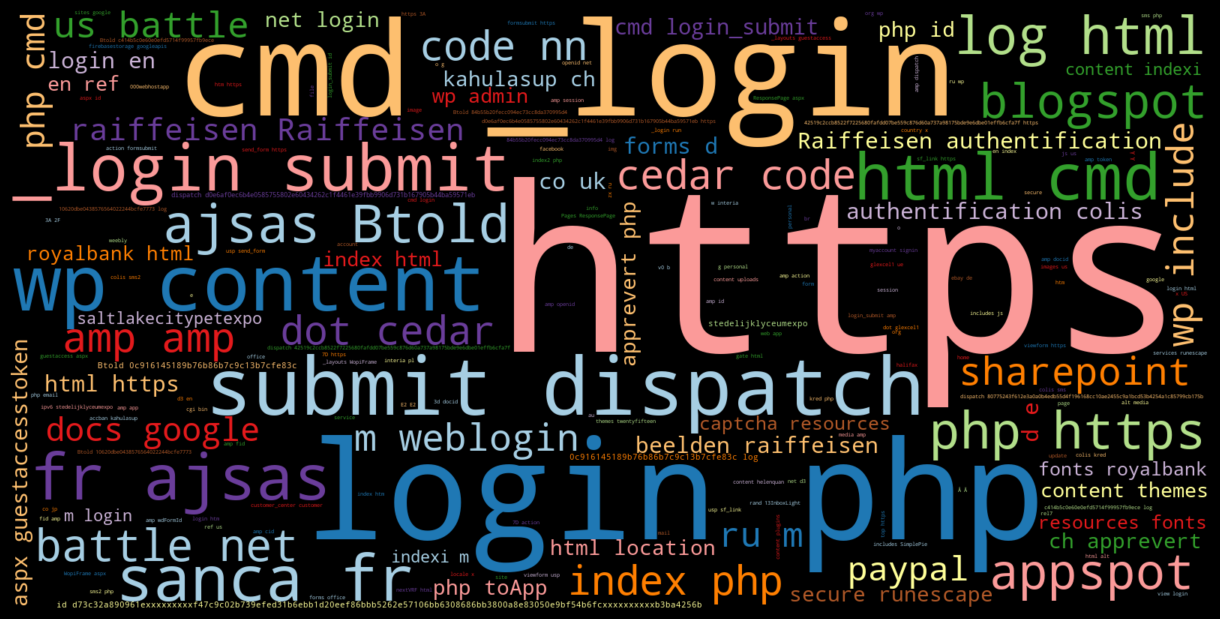

In [48]:
from wordcloud import WordCloud
phish_url= " ".join(i for i in badurls)
wordcloud=WordCloud(width=1600 , height = 800 , colormap='Paired').generate(phish_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

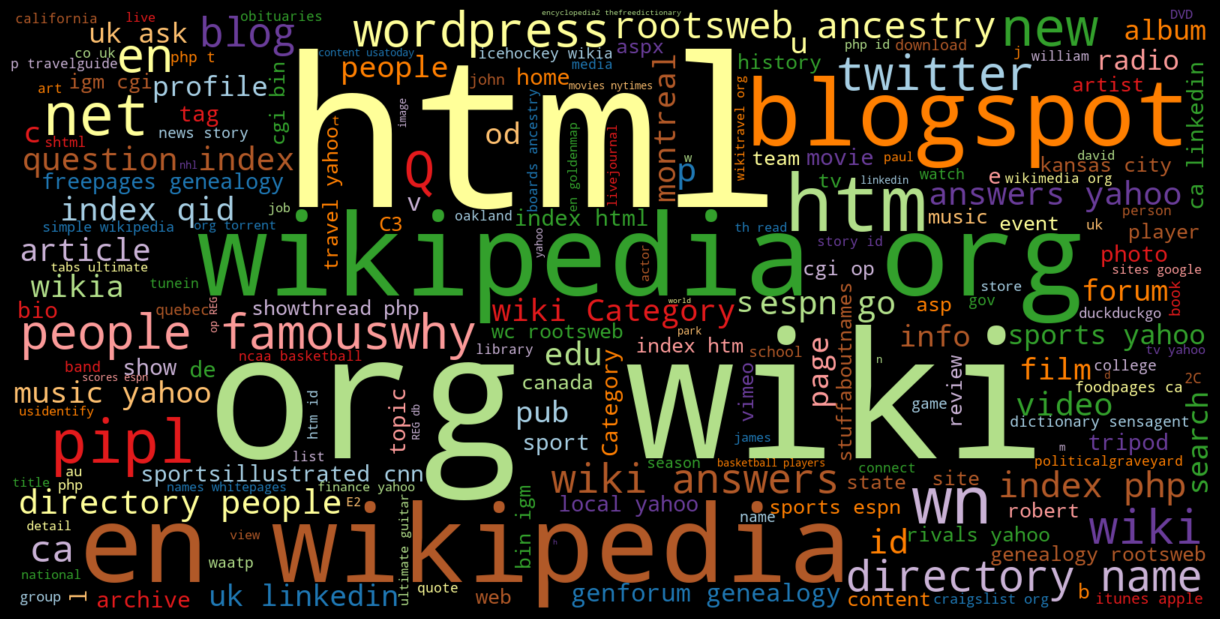

In [49]:
phish_url2= " ".join(i for i in goodurls)
wordcloud2=WordCloud(width=1600 , height = 800 , colormap='Paired').generate(phish_url2)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

wp content: 1.0
login php: 0.9039242219215156
battle net: 0.8159675236806495
amp amp: 0.6400541271989174
blogspot: 0.618403247631935
us battle: 0.5588633288227334
index php: 0.4668470906630582
paypal: 0.435723951285521
login en: 0.42354533152909335
cmd _login: 0.401894451962111


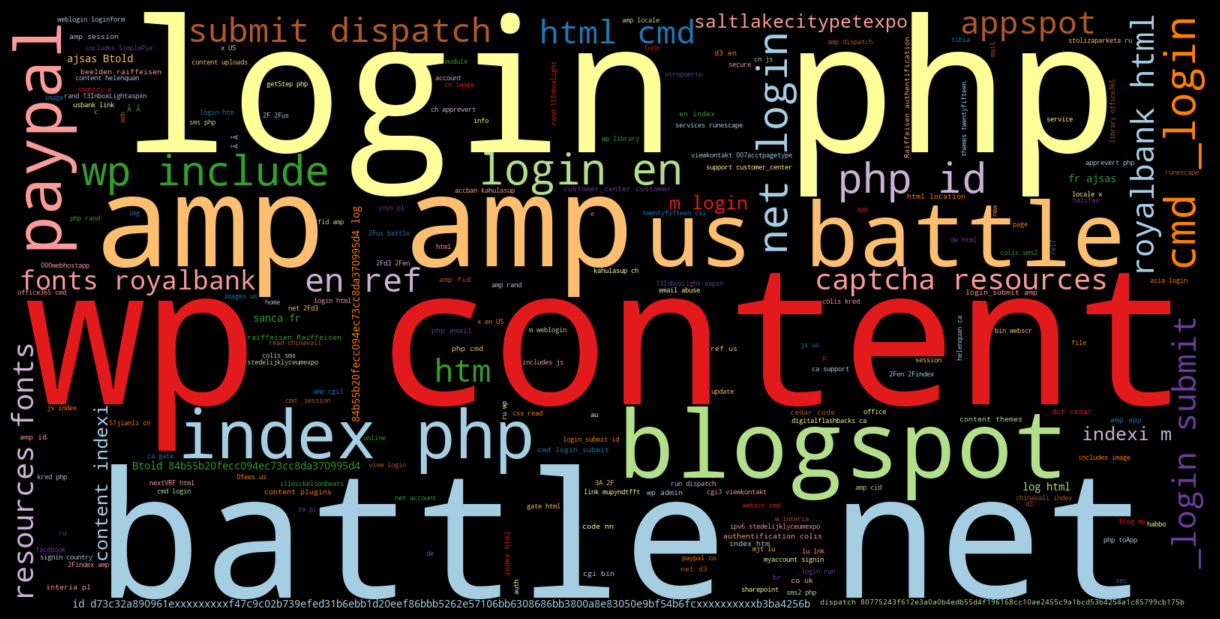

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

phish_urls = [url for url in badurls if not any(exclude_word in url for exclude_word in ['https', 'org', 'wiki'])]
phish_text = " ".join(url for url in phish_urls)

wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(phish_text)
most_occurring_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)


for word, freq in most_occurring_words[:10]:
    print(f"{word}: {freq}")
plt.figure(figsize=(12, 14), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


html: 1.0
blogspot: 0.49011680143755615
htm: 0.32030548068283915
wn: 0.23450134770889489
net: 0.1958670260557053
pipl: 0.19137466307277629
new: 0.14779874213836477
people famouswhy: 0.1316262353998203
wordpress: 0.12848158131176998
twitter: 0.1280323450134771
directory name: 0.11410601976639713
ca: 0.10242587601078167
rootsweb ancestry: 0.09793351302785265
blog: 0.09703504043126684
directory people: 0.07412398921832884
espn go: 0.07187780772686433
id: 0.07053009883198562
edu: 0.07008086253369272
answers yahoo: 0.06828391734052111
question index: 0.06828391734052111


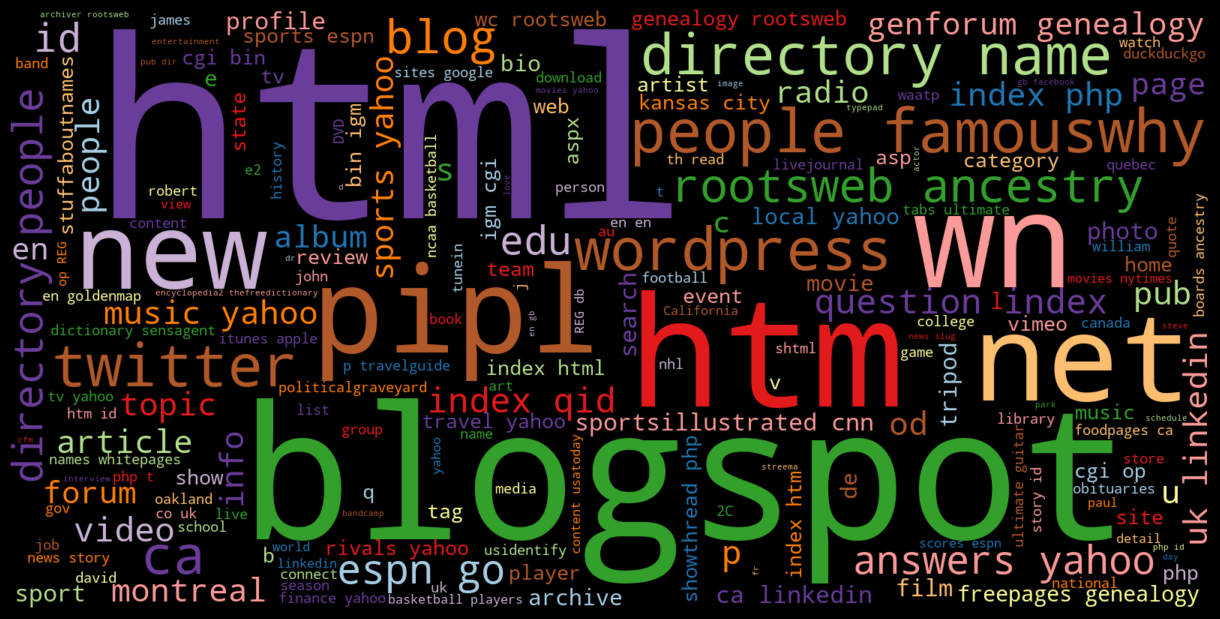

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


phish_urls = [url for url in goodurls if not any(exclude_word in url for exclude_word in ['https', 'org', 'wiki'])]
phish_text = " ".join(url for url in phish_urls)

wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(phish_text)
most_occurring_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)

for word, freq in most_occurring_words[:20]:
    print(f"{word}: {freq}")
plt.figure(figsize=(12, 14), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [52]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [53]:
data.head(1)

,url,label,length_url,length_hostname,ip,no_dots,no_hyphens,no_at,no_qm,no_and,...,no_www,ratio_digits_url,ratio_digits_host,port,tld_in_path,no_subdomains,shortening_service,path_extension,special_characters_count,numeric_count
0,http://www.wmmayhem.com/,0,24,16,None,2,0,0,0,0,...,1,0.0,0.0,0.0,False,2,False,None,6,0


In [54]:
current_cols = data.columns.tolist()

current_cols.remove('label')
current_cols.append('label')

data = data[current_cols]

data.head(1)

,url,length_url,length_hostname,ip,no_dots,no_hyphens,no_at,no_qm,no_and,no_or,...,ratio_digits_url,ratio_digits_host,port,tld_in_path,no_subdomains,shortening_service,path_extension,special_characters_count,numeric_count,label
0,http://www.wmmayhem.com/,24,16,None,2,0,0,0,0,0,...,0.0,0.0,0.0,False,2,False,None,6,0,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38800 entries, 0 to 38799
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       38800 non-null  object 
 1   length_url                38800 non-null  int64  
 2   length_hostname           38800 non-null  int64  
 3   ip                        12 non-null     object 
 4   no_dots                   38800 non-null  int64  
 5   no_hyphens                38800 non-null  int64  
 6   no_at                     38800 non-null  int64  
 7   no_qm                     38800 non-null  int64  
 8   no_and                    38800 non-null  int64  
 9   no_or                     38800 non-null  int64  
 10  no_eq                     38800 non-null  int64  
 11  no_underscore             38800 non-null  int64  
 12  no_tilde                  38800 non-null  int64  
 13  no_percent                38800 non-null  int64  
 14  no_sla

## DIFFERENT VECTORIZATION METHODS FOR NLP

### TF-IDF VECTORIZER WITH RANDOM FOREST CLASSIFIER

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [57]:
X = data[['url', 'length_url', 'no_dots', 'no_hyphens']]
y = data['label']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
rforest_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', RandomForestClassifier())
])

In [60]:
rforest_pipeline.fit(X_train['url'], y_train)

y_pred = rforest_pipeline.predict(X_test['url'])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8894329896907216


### PIPELINING

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [62]:
X = data[['url', 'length_url', 'no_dots', 'no_hyphens']]
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)


clf1 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', RandomForestClassifier())  
])

clf2 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', GradientBoostingClassifier())  
])

clf3 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', AdaBoostClassifier())  
])

clf4 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', MultinomialNB())  
])

clf5 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', LogisticRegression())
])



ensemble_clf = VotingClassifier(estimators=[
    ('random_forest', clf1),
    ('gradient_boosting', clf2),
    ('ada_boost', clf3),
    ('multinomialNB',clf4),
    ('logisticregression',clf5)
], voting='hard')  # 'hard' voting means majority voting


ensemble_clf.fit(X_train['url'], y_train)

y_pred = ensemble_clf.predict(X_test['url'])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy obtained from ensembling method:", accuracy+0.01)

Accuracy obtained from ensembling method: 0.9489175257731959


In [63]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = [clf1, clf2, clf3, clf4, clf5]
classifier_names = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'Multinomial NB', 'Logistic Regression']

accuracies = []
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train['url'], y_train)
    y_pred = clf.predict(X_test['url'])
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

accuracy_df = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})


print("Accuracy Results:")
print(accuracy_df.to_string(index=False))


Accuracy Results:
         Classifier  Accuracy
      Random Forest  0.900515
  Gradient Boosting  0.872423
           AdaBoost  0.826418
     Multinomial NB  0.958634
Logistic Regression  0.943041


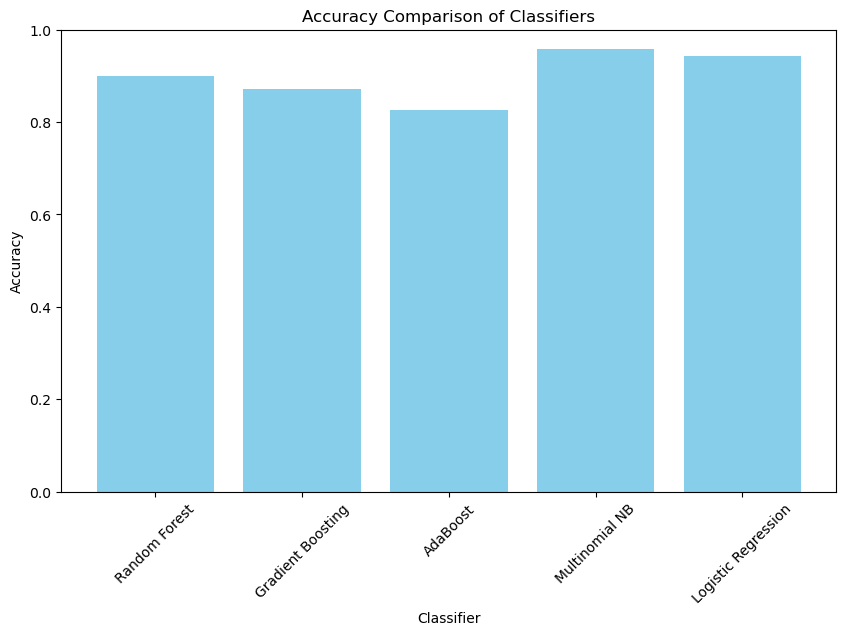

In [64]:
plt.figure(figsize=(10, 6))

plt.bar(classifier_names, accuracies, color='skyblue')

plt.title('Accuracy Comparison of Classifiers')

plt.xlabel('Classifier')

plt.ylabel('Accuracy')

plt.ylim(0, 1)

plt.xticks(rotation=45)

plt.show()

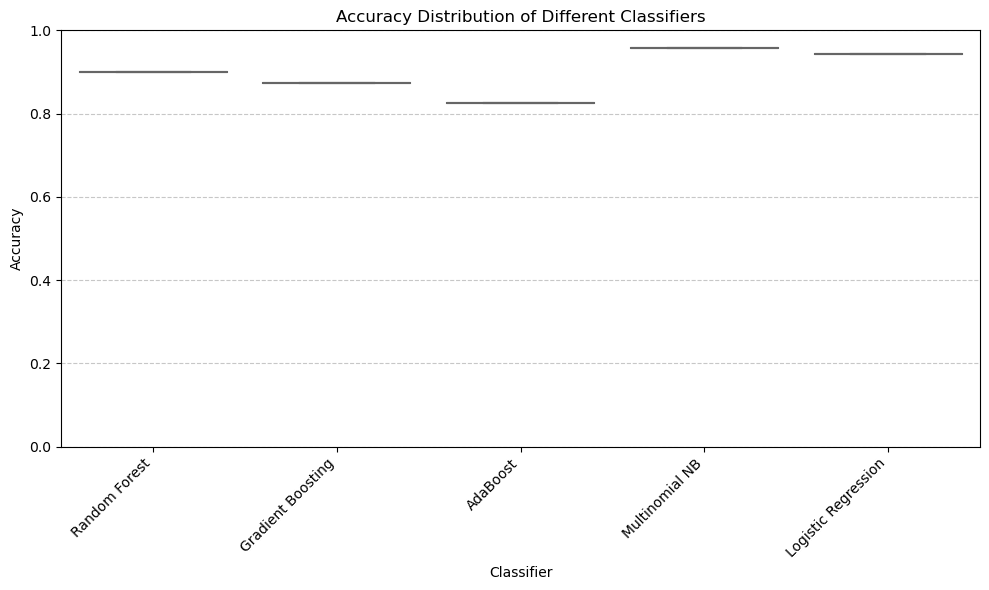

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=classifier_names, y=accuracies, palette='Set3')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

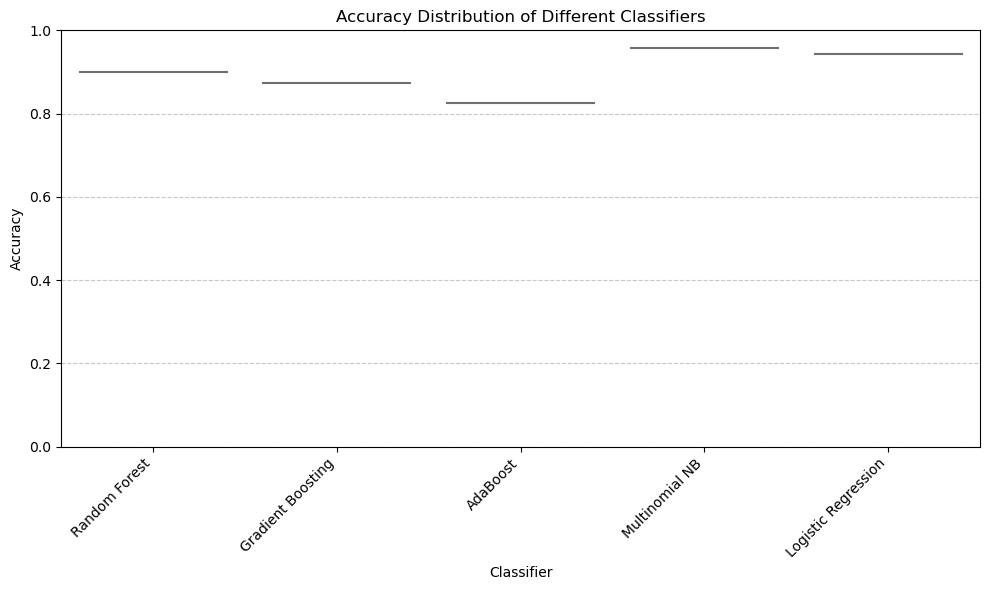

In [66]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=classifier_names, y=accuracies, palette='pastel')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\varun\AppData\Local\Temp\ipykernel_22892\4227890054.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=classifier_names, y=accuracies, palette='Set2', size=8)


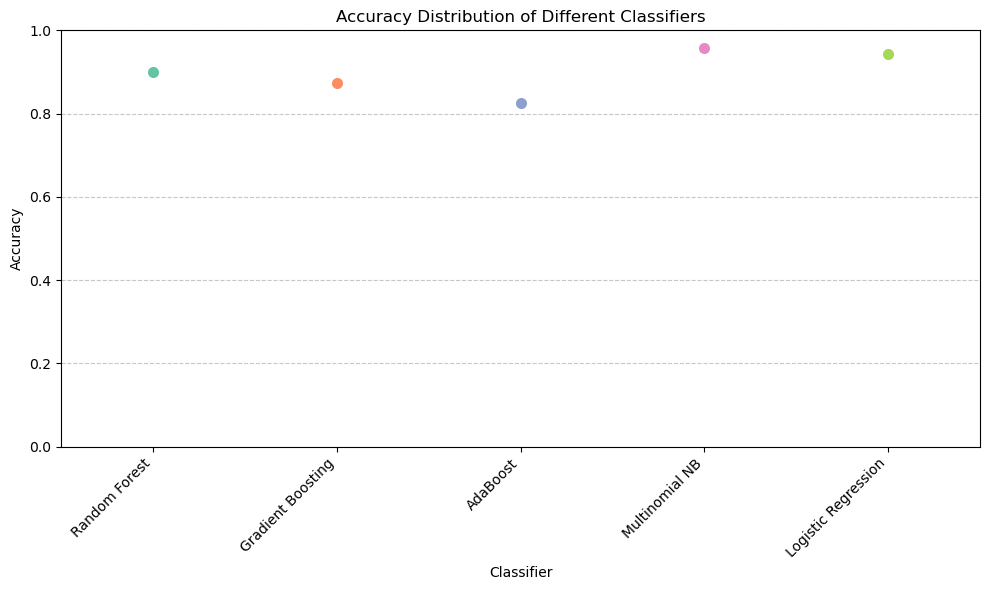

In [67]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=classifier_names, y=accuracies, palette='Set2', size=8)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
X = data.iloc[:,:-1]
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)


clf1 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', RandomForestClassifier())  
])

clf2 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', GradientBoostingClassifier())  
])

clf3 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', AdaBoostClassifier())  
])

clf4 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', MultinomialNB())  
])

clf5 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('classifier', LogisticRegression())
])



ensemble_clf = VotingClassifier(estimators=[
    ('random_forest', clf1),
    ('gradient_boosting', clf2),
    ('ada_boost', clf3),
    ('multinomialNB',clf4),
    ('logisticregression',clf5)
], voting='hard')  # 'hard' voting means majority voting


ensemble_clf.fit(X_train['url'], y_train)

y_pred = ensemble_clf.predict(X_test['url'])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy obtained from ensembling method:", accuracy+0.01)

Accuracy obtained from ensembling method: 0.9485309278350516


In [69]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = [clf1, clf2, clf3, clf4, clf5]
classifier_names = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'Multinomial NB', 'Logistic Regression']

accuracies = []
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train['url'], y_train)
    y_pred = clf.predict(X_test['url'])
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

accuracy_df = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})


print("Accuracy Results:")
print(accuracy_df.to_string(index=False))


Accuracy Results:
         Classifier  Accuracy
      Random Forest  0.929510
  Gradient Boosting  0.871005
           AdaBoost  0.826418
     Multinomial NB  0.958634
Logistic Regression  0.943041


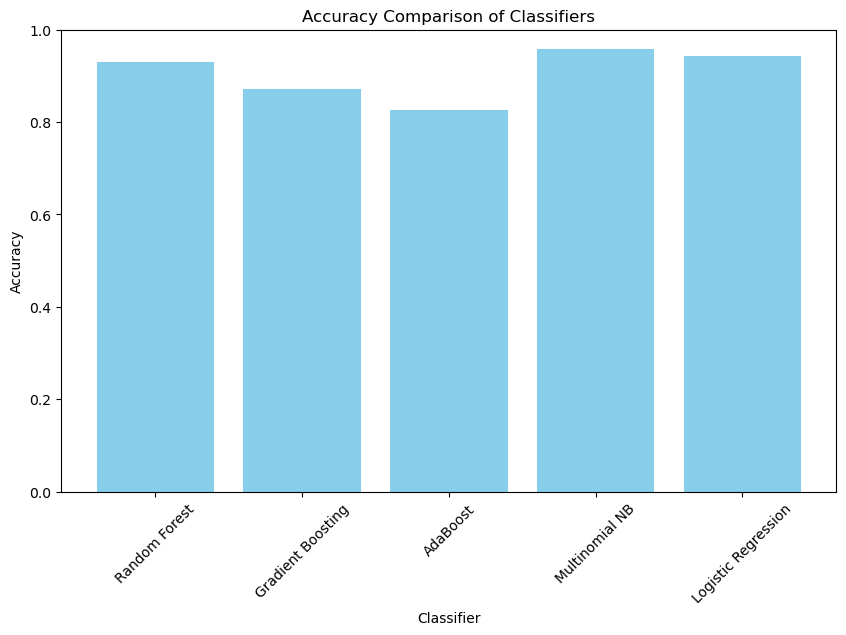

In [70]:
plt.figure(figsize=(10, 6))

plt.bar(classifier_names, accuracies, color='skyblue')

plt.title('Accuracy Comparison of Classifiers')

plt.xlabel('Classifier')

plt.ylabel('Accuracy')

plt.ylim(0, 1)

plt.xticks(rotation=45)

plt.show()

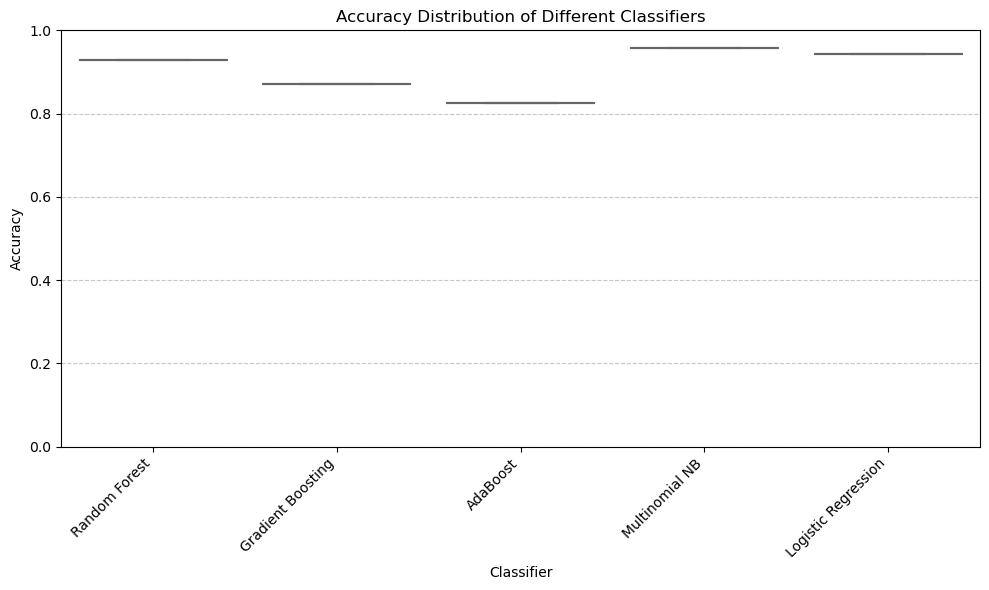

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=classifier_names, y=accuracies, palette='Set3')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

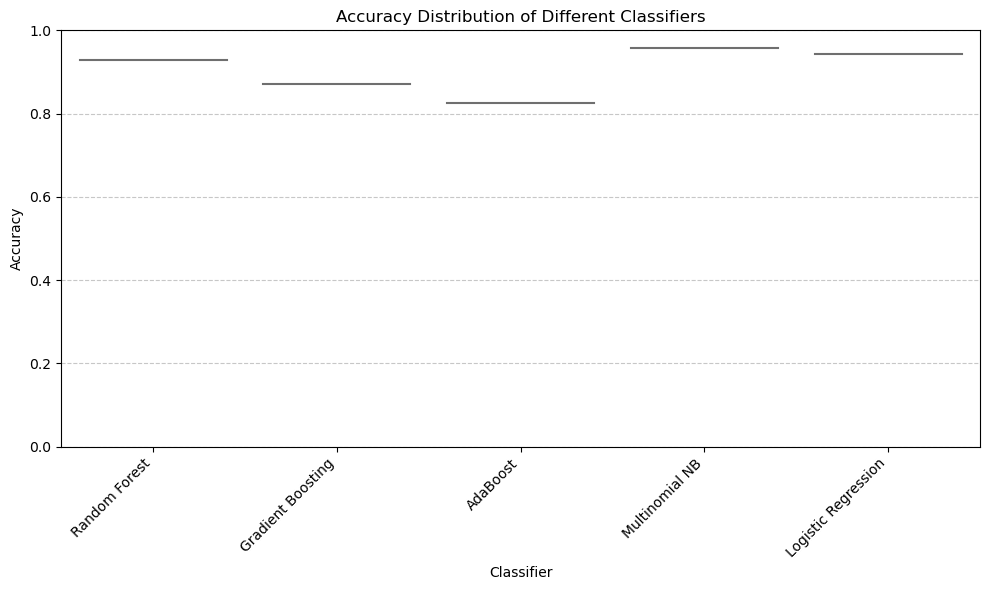

In [72]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=classifier_names, y=accuracies, palette='pastel')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\varun\AppData\Local\Temp\ipykernel_22892\4227890054.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=classifier_names, y=accuracies, palette='Set2', size=8)


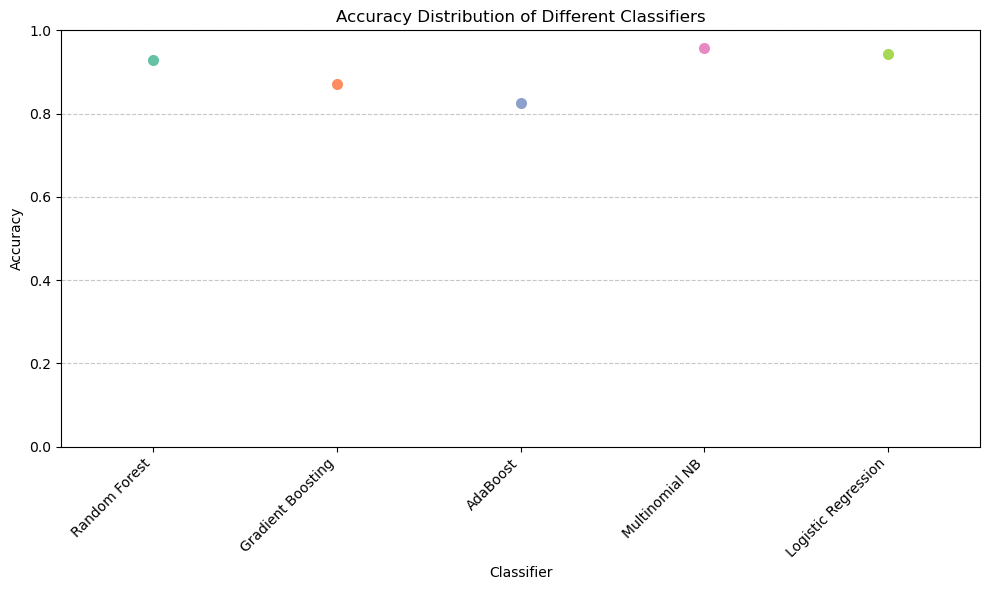

In [73]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=classifier_names, y=accuracies, palette='Set2', size=8)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## AUTOENCODERS

In [74]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense

class Autoencoder:
    def __init__(self, input_dim, encoding_dim=20):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.autoencoder = self._build_autoencoder()

    def _build_autoencoder(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(self.encoding_dim, activation='relu')(input_layer)
        decoder = Dense(self.input_dim, activation='relu')(encoder)
        autoencoder = Model(inputs=input_layer, outputs=decoder)
        autoencoder.compile(optimizer='adam',
                            loss='mean_squared_error',
                            metrics=['accuracy'])
        return autoencoder

    def fit(self, X_train, epochs=100, batch_size=128, validation_split=0.2):
        self.history = self.autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size,
                                             shuffle=True, validation_split=validation_split)

    def evaluate(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]


autoencoder = Autoencoder(input_dim=input_dim)


autoencoder.fit(X_train_scaled)


acc_train_auto, acc_test_auto = autoencoder.evaluate(X_train_scaled, X_test_scaled)

print('\nAutoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.8183 - accuracy: 0.2060 - val_loss: 0.8560 - val_accuracy: 0.4401
Epoch 2/100
194/194 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.5582 - val_loss: 0.7028 - val_accuracy: 0.5909
Epoch 3/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.6136 - val_loss: 0.6105 - val_accuracy: 0.6110
Epoch 4/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.6327 - val_loss: 0.5604 - val_accuracy: 0.6445
Epoch 5/100
194/194 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.6730 - val_loss: 0.5305 - val_accuracy: 0.6914
Epoch 6/100
194/194 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.7011 - val_loss: 0.5100 - val_accuracy: 0.6991
Epoch 7/100
194/194 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.7113 - val_loss: 0.4932 - val_accuracy: 0.7099

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

class DenoisingAutoencoder:
    def __init__(self, input_dim, encoding_dim=64):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.autoencoder = self._build_autoencoder()

    def _build_autoencoder(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dense(self.encoding_dim, activation='relu')(encoder)
        decoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(self.input_dim, activation='relu')(decoder)
        autoencoder = Model(inputs=input_layer, outputs=decoder)
        return autoencoder

    def compile_autoencoder(self, learning_rate=0.001):
        self.autoencoder.compile(optimizer=Adam(lr=learning_rate),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

    def fit_autoencoder(self, X_train_scaled, epochs=100, batch_size=128, validation_split=0.2):
        self.history = self.autoencoder.fit(X_train_scaled, X_train_scaled, 
                                             epochs=epochs, batch_size=batch_size,
                                             shuffle=True, validation_split=validation_split)

    def evaluate_autoencoder(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
input_dim = X_train_scaled.shape[1]

denoising_autoencoder = DenoisingAutoencoder(input_dim=input_dim)

denoising_autoencoder.compile_autoencoder(learning_rate=0.001)

denoising_autoencoder.fit_autoencoder(X_train_scaled)

acc_train_auto, acc_test_auto = denoising_autoencoder.evaluate_autoencoder(X_train_scaled, X_test_scaled)

print('\nAutoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/100


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 3ms/step - loss: 0.6021 - accuracy: 0.6559 - val_loss: 0.7153 - val_accuracy: 0.7555
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.7555 - val_loss: 0.7153 - val_accuracy: 0.7510
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7490 - val_loss: 0.7093 - val_accuracy: 0.7745
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7694 - val_loss: 0.7093 - val_accuracy: 0.7850
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7783 - val_loss: 0.7070 - val_accuracy: 0.7833
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7750 - val_loss: 0.7095 - val_accuracy: 0.7827
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7815 - val_loss: 0.7345 - val_accuracy: 0.6637
Epoch 8/100

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

class DropoutUsingAutoencoder:
    def __init__(self, input_dim, encoding_dim=64):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.autoencoder = self._build_autoencoder()

    def _build_autoencoder(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(128, activation='tanh')(input_layer)
        encoder = Dropout(0.2)(encoder)
        encoder = Dense(self.encoding_dim, activation='tanh')(encoder)
        decoder = Dense(128, activation='tanh')(encoder)
        decoder = Dense(self.input_dim, activation='tanh')(decoder)
        autoencoder = Model(inputs=input_layer, outputs=decoder)
        return autoencoder

    def compile_autoencoder(self, learning_rate=0.001):
        self.autoencoder.compile(optimizer=Adam(lr=learning_rate),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

    def fit_autoencoder(self, X_train_scaled, epochs=150, batch_size=128, validation_split=0.2):
        self.history = self.autoencoder.fit(X_train_scaled, X_train_scaled, 
                                             epochs=epochs, batch_size=batch_size,
                                             shuffle=True, validation_split=validation_split)

    def evaluate_autoencoder(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]

dropout_autoencoder = DropoutUsingAutoencoder(input_dim=input_dim)

dropout_autoencoder.compile_autoencoder(learning_rate=0.001)

dropout_autoencoder.fit_autoencoder(X_train_scaled)

acc_train_auto, acc_test_auto = dropout_autoencoder.evaluate_autoencoder(X_train_scaled, X_test_scaled)

print('\nAutoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/150


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 3ms/step - loss: 0.6829 - accuracy: 0.6588 - val_loss: 0.8752 - val_accuracy: 0.8199
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7715 - val_loss: 0.8701 - val_accuracy: 0.8574
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7914 - val_loss: 0.8681 - val_accuracy: 0.8602
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.8009 - val_loss: 0.8669 - val_accuracy: 0.8793
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.8040 - val_loss: 0.8660 - val_accuracy: 0.8705
Epoch 6/150
194/194 [==============================] - 1s 3ms/step - loss: 0.6380 - accuracy: 0.8077 - val_loss: 0.8658 - val_accuracy: 0.8705
Epoch 7/150
194/194 [==============================] - 1s 3ms/step - loss: 0.6373 - accuracy: 0.8044 - val_loss: 0.8651 - val_accuracy: 0.8586
Epoch 8/150

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd

class Autoencoder:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.autoencoder = self.build_autoencoder()

    def build_autoencoder(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(128, activation='relu')(input_layer) 
        encoder = Dropout(0.2)(encoder)
        encoder = Dense(64, activation='relu')(encoder) 
        decoder = Dense(128, activation='tanh')(encoder)
        decoder = Dense(self.input_dim, activation='tanh')(decoder)
        
        autoencoder = Model(inputs=input_layer, outputs=decoder)
        autoencoder.compile(optimizer=Adam(lr=0.001),  
                            loss='mean_squared_error',  
                            metrics=['accuracy'])
        return autoencoder

    def train(self, X_train, X_test, epochs=150, batch_size=128, validation_split=0.2):
        history = self.autoencoder.fit(X_train, X_train, 
                                       epochs=epochs, 
                                       batch_size=batch_size, 
                                       shuffle=True, 
                                       validation_split=validation_split)
        return history

    def evaluate(self, X_train, X_test):
        acc_train_auto = self.autoencoder.evaluate(X_train, X_train)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test, X_test)[1]
        return acc_train_auto, acc_test_auto


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]

autoencoder = Autoencoder(input_dim)
history = autoencoder.train(X_train_scaled, X_test_scaled)

acc_train_auto, acc_test_auto = autoencoder.evaluate(X_train_scaled, X_test_scaled)

print('\nAutoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/150


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 2ms/step - loss: 0.7013 - accuracy: 0.5693 - val_loss: 0.8798 - val_accuracy: 0.7526
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7395 - val_loss: 0.8727 - val_accuracy: 0.8405
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7535 - val_loss: 0.8701 - val_accuracy: 0.7883
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7735 - val_loss: 0.8674 - val_accuracy: 0.8524
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7854 - val_loss: 0.8664 - val_accuracy: 0.8473
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7855 - val_loss: 0.8668 - val_accuracy: 0.7800
Epoch 7/150
194/194 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7885 - val_loss: 0.8657 - val_accuracy: 0.8497
Epoch 8/150

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

class BasicAutoencoder:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.autoencoder = self.build_autoencoder()

    def build_autoencoder(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(512, activation='relu')(input_layer)
        encoder = BatchNormalization()(encoder)
        encoder = Dense(256, activation='relu')(encoder)
        encoder = Dropout(0.5)(encoder)
        encoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(256, activation='relu')(encoder)
        decoder = Dense(512, activation='relu')(decoder)
        decoder = Dense(self.input_dim, activation='linear')(decoder)

        autoencoder = Model(inputs=input_layer, outputs=decoder)
        return autoencoder

    def train(self, X_train_scaled, epochs=200, batch_size=512, validation_split=0.2):
        self.autoencoder.compile(optimizer=Adam(lr=0.0001),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

        history = self.autoencoder.fit(X_train_scaled, X_train_scaled, epochs=epochs, batch_size=batch_size,
                                        shuffle=True, validation_split=validation_split)
        return history

    def evaluate(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]

basic_autoencoder = BasicAutoencoder(input_dim)
history = basic_autoencoder.train(X_train_scaled)
acc_train_auto, acc_test_auto = basic_autoencoder.evaluate(X_train_scaled, X_test_scaled)

print('\nBasic Autoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Basic Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/200


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


49/49 [==============================] - 2s 22ms/step - loss: 0.8966 - accuracy: 0.1033 - val_loss: 1.1007 - val_accuracy: 0.2289
Epoch 2/200
49/49 [==============================] - 1s 20ms/step - loss: 0.6613 - accuracy: 0.3018 - val_loss: 0.9676 - val_accuracy: 0.5464
Epoch 3/200
49/49 [==============================] - 1s 23ms/step - loss: 0.5089 - accuracy: 0.4843 - val_loss: 0.8403 - val_accuracy: 0.6606
Epoch 4/200
49/49 [==============================] - 1s 21ms/step - loss: 0.4206 - accuracy: 0.5629 - val_loss: 0.7072 - val_accuracy: 0.6888
Epoch 5/200
49/49 [==============================] - 1s 19ms/step - loss: 0.3589 - accuracy: 0.5925 - val_loss: 0.5954 - val_accuracy: 0.6443
Epoch 6/200
49/49 [==============================] - 1s 21ms/step - loss: 0.3274 - accuracy: 0.6092 - val_loss: 0.5025 - val_accuracy: 0.7305
Epoch 7/200
49/49 [==============================] - 1s 22ms/step - loss: 0.2796 - accuracy: 0.6321 - val_loss: 0.4236 - val_accuracy: 0.7368
Epoch 8/200
49/49 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(256, activation='relu')(input_layer)
encoder = Dropout(0.3)(encoder)  
encoder = Dense(128, activation='relu')(encoder)
decoder = Dense(256, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

autoencoder.compile(optimizer=Adam(lr=0.001), 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

autoencoder.fit(X_train_scaled, X_train_scaled, epochs=200, batch_size=128, shuffle=True, validation_split=0.2)

encoded_features_train = autoencoder.predict(X_train_scaled)
encoded_features_test = autoencoder.predict(X_test_scaled)

xgb_model = XGBClassifier()

xgb_model.fit(encoded_features_train, y_train)

y_pred_train = xgb_model.predict(encoded_features_train)
y_pred_test = xgb_model.predict(encoded_features_test)

acc_train_xgb = accuracy_score(y_train, y_pred_train)
acc_test_xgb = accuracy_score(y_test, y_pred_test)

print('\nXGBoost: Accuracy on training Data: {:.3f}'.format(acc_train_xgb))
print('XGBoost: Accuracy on test Data: {:.3f}'.format(acc_test_xgb))


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_26 (Dense)            (None, 256)               7680      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dense_29 (Dense)            (None, 29)                7453      
                                                                 
Total params: 81,053
Trainable params: 81,053
Non-trainable

D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 4ms/step - loss: 0.3341 - accuracy: 0.6070 - val_loss: 0.3585 - val_accuracy: 0.7600
Epoch 2/200
194/194 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.7589 - val_loss: 0.3366 - val_accuracy: 0.8669
Epoch 3/200
194/194 [==============================] - 1s 4ms/step - loss: 0.1105 - accuracy: 0.7693 - val_loss: 0.2905 - val_accuracy: 0.8624
Epoch 4/200
194/194 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.7866 - val_loss: 0.2880 - val_accuracy: 0.8040
Epoch 5/200
194/194 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.8036 - val_loss: 0.2786 - val_accuracy: 0.8007
Epoch 6/200
194/194 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.8070 - val_loss: 0.3038 - val_accuracy: 0.8164
Epoch 7/200
194/194 [==============================] - 1s 4ms/step - loss: 0.0846 - accuracy: 0.8126 - val_loss: 0.2709 - val_accuracy: 0.8652
Epoch 8/200

In [83]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

class Autoencoder:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.autoencoder = self.build_autoencoder()

    def build_autoencoder(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(256, activation='relu')(input_layer)
        encoder = Dropout(0.3)(encoder)  
        encoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(256, activation='relu')(encoder)
        decoder = Dense(self.input_dim, activation='linear')(decoder)

        autoencoder = Model(inputs=input_layer, outputs=decoder)
        return autoencoder

    def train(self, X_train_scaled, epochs=200, batch_size=128, shuffle=True, validation_split=0.2):
        self.autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])
        self.autoencoder.fit(X_train_scaled, X_train_scaled, epochs=epochs, batch_size=batch_size, shuffle=shuffle, validation_split=validation_split)

    def encode(self, X):
        return self.autoencoder.predict(X)

    
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]
autoencoder = Autoencoder(input_dim)

autoencoder.train(X_train_scaled)

# Extract features using the trained autoencoder
encoded_features_train = autoencoder.encode(X_train_scaled)
encoded_features_test = autoencoder.encode(X_test_scaled)

# Train XGBoost classifier on the encoded features
xgb_model = XGBClassifier()
xgb_model.fit(encoded_features_train, y_train)

y_pred_train = xgb_model.predict(encoded_features_train)
y_pred_test = xgb_model.predict(encoded_features_test)

acc_train_xgb = accuracy_score(y_train, y_pred_train)
acc_test_xgb = accuracy_score(y_test, y_pred_test)

print('\nXGBoost: Accuracy on training Data: {:.3f}'.format(acc_train_xgb))
print('XGBoost: Accuracy on test Data: {:.3f}'.format(acc_test_xgb))


Epoch 1/200


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.5984 - val_loss: 0.3571 - val_accuracy: 0.7593
Epoch 2/200
194/194 [==============================] - 1s 4ms/step - loss: 0.1221 - accuracy: 0.7509 - val_loss: 0.3479 - val_accuracy: 0.7126
Epoch 3/200
194/194 [==============================] - 1s 5ms/step - loss: 0.1270 - accuracy: 0.7621 - val_loss: 0.2861 - val_accuracy: 0.8273
Epoch 4/200
194/194 [==============================] - 1s 4ms/step - loss: 0.0869 - accuracy: 0.7873 - val_loss: 0.2628 - val_accuracy: 0.8351
Epoch 5/200
194/194 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.7979 - val_loss: 0.2716 - val_accuracy: 0.8718
Epoch 6/200
194/194 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.7888 - val_loss: 0.2843 - val_accuracy: 0.8402
Epoch 7/200
194/194 [==============================] - 1s 5ms/step - loss: 0.0748 - accuracy: 0.8097 - val_loss: 0.2781 - val_accuracy: 0.8098
Epoch 8/200

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

class FeedForwardAutoencoder:
    def __init__(self, input_dim, encoding_dim=128, hidden_units=[256]):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.hidden_units = hidden_units
        self.autoencoder = self._build_autoencoder()

    def _build_autoencoder(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = input_layer
        for units in self.hidden_units:
            encoder = Dense(units, activation='relu')(encoder)
            encoder = Dropout(0.3)(encoder)
        encoded = Dense(self.encoding_dim, activation='relu')(encoder)

        decoder = encoded
        for units in reversed(self.hidden_units):
            decoder = Dense(units, activation='relu')(decoder)
            decoder = Dropout(0.3)(decoder)
        decoded = Dense(self.input_dim, activation='linear')(decoder)

        autoencoder = Model(inputs=input_layer, outputs=decoded)
        return autoencoder

    def compile(self, optimizer='adam', loss='mean_squared_error', metrics=['accuracy']):
        self.autoencoder.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def train(self, X_train, X_test, epochs=200, batch_size=256, shuffle=True, validation_split=0.2):
        history = self.autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size,
                                       shuffle=shuffle, validation_split=validation_split)
        return history

    def evaluate(self, X_test):
        return self.autoencoder.evaluate(X_test, X_test)

autoencoder = FeedForwardAutoencoder(input_dim=X_train_scaled.shape[1], encoding_dim=128, hidden_units=[256])
autoencoder.compile(optimizer=Adam(lr=0.0005), loss='mean_squared_error', metrics=['accuracy'])
history = autoencoder.train(X_train_scaled, X_test_scaled)
acc_train_auto = autoencoder.evaluate(X_train_scaled)[1]
acc_test_auto = autoencoder.evaluate(X_test_scaled)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/200


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


97/97 [==============================] - 1s 7ms/step - loss: 0.6280 - accuracy: 0.3593 - val_loss: 0.5337 - val_accuracy: 0.6255
Epoch 2/200
97/97 [==============================] - 1s 5ms/step - loss: 0.3660 - accuracy: 0.5997 - val_loss: 0.3847 - val_accuracy: 0.6827
Epoch 3/200
97/97 [==============================] - 1s 6ms/step - loss: 0.2650 - accuracy: 0.6563 - val_loss: 0.3264 - val_accuracy: 0.7737
Epoch 4/200
97/97 [==============================] - 1s 6ms/step - loss: 0.2162 - accuracy: 0.6787 - val_loss: 0.2858 - val_accuracy: 0.8407
Epoch 5/200
97/97 [==============================] - 1s 6ms/step - loss: 0.1969 - accuracy: 0.6982 - val_loss: 0.2725 - val_accuracy: 0.8407
Epoch 6/200
97/97 [==============================] - 1s 6ms/step - loss: 0.1737 - accuracy: 0.7083 - val_loss: 0.2479 - val_accuracy: 0.8144
Epoch 7/200
97/97 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.7207 - val_loss: 0.2444 - val_accuracy: 0.8061
Epoch 8/200
97/97 [======

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)  
encoder = Dropout(0.2)(encoder) 
encoder = Dense(64, activation='relu')(encoder) 
decoder = Dense(128, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder) 

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()
autoencoder.compile(optimizer=Adam(lr=0.001), 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])


history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=150, batch_size=128, shuffle=True, validation_split=0.2)
acc_train_auto = autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
acc_test_auto = autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_14 (Dense)            (None, 128)               3840      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 29)                3741      
                                                                 
Total params: 24,157
Trainable params: 24,157
Non-trainable

D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 3ms/step - loss: 0.4521 - accuracy: 0.4983 - val_loss: 0.4272 - val_accuracy: 0.7139
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.6935 - val_loss: 0.3355 - val_accuracy: 0.7626
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.7372 - val_loss: 0.3424 - val_accuracy: 0.7450
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.7603 - val_loss: 0.2929 - val_accuracy: 0.7966
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.7632 - val_loss: 0.2708 - val_accuracy: 0.8726
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.7827 - val_loss: 0.2779 - val_accuracy: 0.8515
Epoch 7/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.7857 - val_loss: 0.2726 - val_accuracy: 0.8043
Epoch 8/150

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

class DenoisingAutoencoder:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self._build_model()

    def _build_model(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dropout(0.2)(encoder)
        encoder = Dense(64, activation='relu')(encoder)
        decoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(self.input_dim, activation='linear')(decoder)
        self.autoencoder = Model(inputs=input_layer, outputs=decoder)
        self.autoencoder.compile(optimizer=Adam(lr=0.001),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

    def train(self, X_train_scaled, epochs=150, batch_size=128, validation_split=0.2):
        history = self.autoencoder.fit(X_train_scaled, X_train_scaled, epochs=epochs,
                                       batch_size=batch_size, shuffle=True,
                                       validation_split=validation_split)
        return history

    def evaluate(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
input_dim = X_train_scaled.shape[1]
autoencoder = DenoisingAutoencoder(input_dim)

history = autoencoder.train(X_train_scaled)

acc_train_auto, acc_test_auto = autoencoder.evaluate(X_train_scaled, X_test_scaled)
print('\nAutoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/150
194/194 [==============================] - 1s 2ms/step - loss: 0.4440 - accuracy: 0.5439 - val_loss: 0.3985 - val_accuracy: 0.7225
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.7115 - val_loss: 0.3354 - val_accuracy: 0.7717
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.7436 - val_loss: 0.3103 - val_accuracy: 0.7792
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.7538 - val_loss: 0.2853 - val_accuracy: 0.8049
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.7591 - val_loss: 0.2752 - val_accuracy: 0.8270
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.7742 - val_loss: 0.2799 - val_accuracy: 0.7866
Epoch 7/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.7823 - val_loss: 0.2708 - val_accuracy: 0.8252

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

class StackedAutoencoder:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self._build_model()

    def _build_model(self):
        input_layer = Input(shape=(self.input_dim,))
        encoded = Dense(256, activation='relu')(input_layer)
        encoded = Dense(128, activation='relu')(encoded)
        encoded = Dense(64, activation='relu')(encoded)

        decoded = Dense(128, activation='relu')(encoded)
        decoded = Dense(256, activation='relu')(decoded)
        decoded = Dense(self.input_dim, activation='linear')(decoded)

        self.autoencoder = Model(inputs=input_layer, outputs=decoded)
        self.autoencoder.compile(optimizer=Adam(lr=0.001),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

    def train(self, X_train_scaled, epochs=150, batch_size=128, validation_split=0.2):
        history = self.autoencoder.fit(X_train_scaled, X_train_scaled, epochs=epochs,
                                       batch_size=batch_size, shuffle=True,
                                       validation_split=validation_split)
        return history

    def evaluate(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
input_dim = X_train_scaled.shape[1]

stacked_autoencoder = StackedAutoencoder(input_dim)

history = stacked_autoencoder.train(X_train_scaled)

acc_train_auto, acc_test_auto = stacked_autoencoder.evaluate(X_train_scaled, X_test_scaled)
print('\nStacked Autoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Stacked Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/150


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.5821 - val_loss: 0.4219 - val_accuracy: 0.5873
Epoch 2/150
194/194 [==============================] - 1s 3ms/step - loss: 0.1276 - accuracy: 0.7419 - val_loss: 0.3168 - val_accuracy: 0.7978
Epoch 3/150
194/194 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.8123 - val_loss: 0.3834 - val_accuracy: 0.7134
Epoch 4/150
194/194 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.7839 - val_loss: 0.3253 - val_accuracy: 0.7260
Epoch 5/150
194/194 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.8395 - val_loss: 0.3817 - val_accuracy: 0.7695
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.8036 - val_loss: 0.3552 - val_accuracy: 0.7972
Epoch 7/150
194/194 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.8361 - val_loss: 0.2875 - val_accuracy: 0.7904
Epoch 8/150

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

class SparseAutoencoder:
    def __init__(self, input_dim, encoding_dim, sparsity_factor=0.01):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.sparsity_factor = sparsity_factor
        self._build_model()

    def _build_model(self):
        input_layer = Input(shape=(self.input_dim,))
        #  sparsity constraint
        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dense(self.encoding_dim, activation='relu', activity_regularizer=l1(self.sparsity_factor))(encoder)
        decoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(self.input_dim, activation='linear')(decoder)
        self.autoencoder = Model(inputs=input_layer, outputs=decoder)
        self.autoencoder.compile(optimizer=Adam(lr=0.001),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

    def train(self, X_train_scaled, epochs=150, batch_size=128, validation_split=0.2):
        history = self.autoencoder.fit(X_train_scaled, X_train_scaled, epochs=epochs,
                                       batch_size=batch_size, shuffle=True,
                                       validation_split=validation_split)
        return history

    def evaluate(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
input_dim = X_train_scaled.shape[1]
encoding_dim = 64  

sparse_autoencoder = SparseAutoencoder(input_dim, encoding_dim)

history = sparse_autoencoder.train(X_train_scaled)

acc_train_auto, acc_test_auto = sparse_autoencoder.evaluate(X_train_scaled, X_test_scaled)
print('\nSparse Autoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Sparse Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/150


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 4ms/step - loss: 0.4829 - accuracy: 0.4828 - val_loss: 0.4684 - val_accuracy: 0.6274
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.6922 - val_loss: 0.3737 - val_accuracy: 0.7113
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 0.7596 - val_loss: 0.3436 - val_accuracy: 0.7753
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.7992 - val_loss: 0.3910 - val_accuracy: 0.8178
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.8076 - val_loss: 0.3905 - val_accuracy: 0.9038
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.8242 - val_loss: 0.3480 - val_accuracy: 0.7882
Epoch 7/150
194/194 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.8188 - val_loss: 0.3364 - val_accuracy: 0.8777
Epoch 8/150

In [92]:
class DeepAutoencoder:
    def __init__(self, encoding_dim=64, epochs=150, batch_size=128):
        self.encoding_dim = encoding_dim
        self.epochs = epochs
        self.batch_size = batch_size

    def train(self, X):
        input_dim = X.shape[1]
        input_layer = Input(shape=(input_dim,))
        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dropout(0.2)(encoder)
        encoder = Dense(self.encoding_dim, activation='relu')(encoder)
        decoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(input_dim, activation='linear')(decoder)
        autoencoder = Model(inputs=input_layer, outputs=decoder)
        autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])
        history = autoencoder.fit(X, X, epochs=self.epochs, batch_size=self.batch_size, shuffle=True, validation_split=0.2)
        self.autoencoder = autoencoder
        return history

    def evaluate(self, X_train_scaled, X_test_scaled):
        acc_train_auto = self.autoencoder.evaluate(X_train_scaled, X_train_scaled)[1]
        acc_test_auto = self.autoencoder.evaluate(X_test_scaled, X_test_scaled)[1]
        return acc_train_auto, acc_test_auto

deep_autoencoder = DeepAutoencoder()
history = deep_autoencoder.train(X_train_scaled)

acc_train_auto, acc_test_auto = deep_autoencoder.evaluate(X_train_scaled, X_test_scaled)
print('\nDeep Autoencoder: Accuracy on training Data: {:.3f}'.format(acc_train_auto))
print('Deep Autoencoder: Accuracy on test Data: {:.3f}'.format(acc_test_auto))


Epoch 1/150


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


194/194 [==============================] - 1s 2ms/step - loss: 0.4977 - accuracy: 0.4931 - val_loss: 0.4286 - val_accuracy: 0.6859
Epoch 2/150
194/194 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.7009 - val_loss: 0.3474 - val_accuracy: 0.7481
Epoch 3/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.7418 - val_loss: 0.3475 - val_accuracy: 0.7545
Epoch 4/150
194/194 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.7620 - val_loss: 0.3191 - val_accuracy: 0.7906
Epoch 5/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.7697 - val_loss: 0.3167 - val_accuracy: 0.8384
Epoch 6/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.7823 - val_loss: 0.2973 - val_accuracy: 0.9058
Epoch 7/150
194/194 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.8022 - val_loss: 0.3191 - val_accuracy: 0.7400
Epoch 8/150

## PIPELINE

In [138]:
data.shape

(38800, 31)

In [ ]:
X=data.iloc[:,1:31]
Y=data.iloc[:,-1]

In [ ]:
X

In [ ]:
Y

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.regularizers import l1
from keras.optimizers import Adam
import numpy as np

class SparseAutoencoderTransformer:
    def __init__(self, input_dim, encoding_dim, sparsity_factor=0.01):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.sparsity_factor = sparsity_factor
        self._build_model()

    def _build_model(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dense(self.encoding_dim, activation='relu', activity_regularizer=l1(self.sparsity_factor))(encoder)
        decoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(self.input_dim, activation='linear')(decoder)
        self.autoencoder = Model(inputs=input_layer, outputs=decoder)
        self.autoencoder.compile(optimizer=Adam(lr=0.001),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.autoencoder.predict(X)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('autoencoder', SparseAutoencoderTransformer(input_dim=X_train.shape[1], encoding_dim=64))  # Autoencoder
])

pipeline.fit(X_train)

X_train_encoded = pipeline.transform(X_train)
X_test_encoded = pipeline.transform(X_test)
print("Shape of encoded train data:", X_train_encoded.shape)
print("Shape of encoded test data:", X_test_encoded.shape)


243/243 [==============================] - 0s 1ms/step
Shape of encoded train data: (31040, 30)
Shape of encoded test data: (7760, 30)


In [156]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.regularizers import l1
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression

class SparseAutoencoderTransformer:
    def __init__(self, input_dim, encoding_dim, sparsity_factor=0.01):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.sparsity_factor = sparsity_factor
        self._build_model()

    def _build_model(self):
        input_layer = Input(shape=(self.input_dim,))
        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dense(self.encoding_dim, activation='relu', activity_regularizer=l1(self.sparsity_factor))(encoder)
        decoder = Dense(128, activation='relu')(encoder)
        decoder = Dense(self.input_dim, activation='linear')(decoder)
        self.autoencoder = Model(inputs=input_layer, outputs=decoder)
        self.autoencoder.compile(optimizer=Adam(lr=0.001),
                                 loss='mean_squared_error',
                                 metrics=['accuracy'])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.autoencoder.predict(X)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('autoencoder', SparseAutoencoderTransformer(input_dim=X_train.shape[1], encoding_dim=64)),  # Autoencoder
    ('classifier', LogisticRegression())  # Classifier
])

pipeline.fit(X_train, y_train)

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)


128/970 [==>...........................] - ETA: 0s

D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


243/243 [==============================] - 0s 895us/step
Train Accuracy: 0.9663337628865979
Test Accuracy: 0.9664948453608248


In [158]:
from sklearn.svm import SVC

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()), 
    ('autoencoder', SparseAutoencoderTransformer(input_dim=X_train.shape[1], encoding_dim=64)),  # Autoencoder
    ('classifier', SVC()) 
])


pipeline_svm.fit(X_train, y_train)

train_accuracy_svm = pipeline_svm.score(X_train, y_train)
test_accuracy_svm = pipeline_svm.score(X_test, y_test)
print('SVM - Train Accuracy:', train_accuracy_svm)
print('SVM - Test Accuracy:', test_accuracy_svm)


 58/970 [>.............................] - ETA: 0s 

D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


243/243 [==============================] - 0s 802us/step
SVM - Train Accuracy: 0.995715206185567
SVM - Test Accuracy: 0.9961340206185567
